# SNLP Exercise Sheet 6 - Programming Part

In [1]:
import re
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from math import log10
import utils

## Exercise 4

In [3]:
def sanitize_text(tokens):
    """Sanizite Text:
        Lowercase
        Remove non characters
    Parameters
    ----------
    tokens : string[]
        Tokenized text

    Returns
    -------
    string[]
        Sanitized tokens.

    """

    tokens = [x.lower() for x in tokens]
    regex = re.compile('[^a-z]')

    for index in range(len(tokens)):
        tokens[index] = regex.sub('', tokens[index])

    # remove empty elements
    tokens = [token for token in tokens if token != '']
    return tokens


def getWordFrequencies(tokens):
    cnt = Counter()

    for word in tokens:
        cnt[word] += 1

    return cnt


def getTokens(path):
    f = open(path, "r")

    tokens = word_tokenize(f.read())

    tokens = sanitize_text(tokens)

    f.close()

    return tokens


def plot_most_common_words(cnt, word_count, title):
    labels = [None] * len(cnt.most_common(word_count))
    frequencies = [None] * len(cnt.most_common(word_count))

    for idx, value in enumerate(cnt.most_common(word_count)):
        labels[idx] = value[0]
        frequencies[idx] = value[1]

    y_pos = np.arange(len(labels))

    plt.bar(y_pos, frequencies, align='center', alpha=0.5)
    plt.xticks(y_pos, labels)
    plt.xlabel('Most common words')
    plt.ylabel('Word Frequencies')
    plt.title(title)

    plt.show()

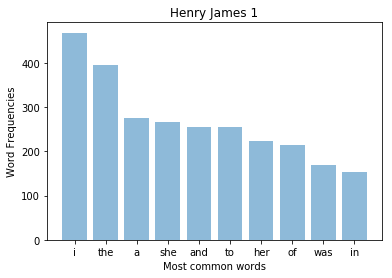

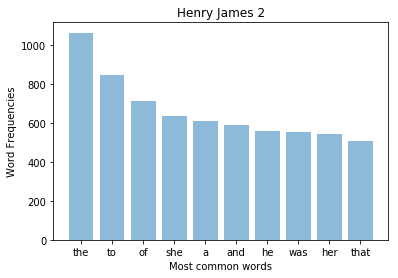

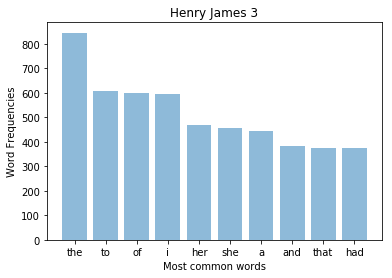

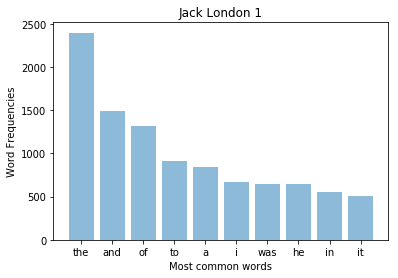

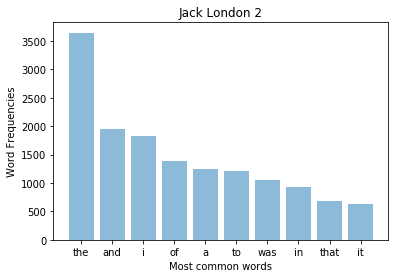

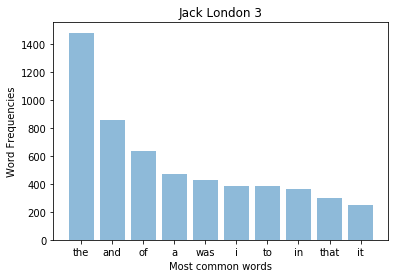

In [4]:
cnt = getWordFrequencies(sanitize_text(getTokens('./corpus/james/Henry James___1.txt')))
plot_most_common_words(cnt, 10, 'Henry James 1')

cnt = getWordFrequencies(sanitize_text(getTokens('./corpus/james/Henry James___2.txt')))
plot_most_common_words(cnt, 10, 'Henry James 2')

cnt = getWordFrequencies(sanitize_text(getTokens('./corpus/james/Henry James___3.txt')))
plot_most_common_words(cnt, 10, 'Henry James 3')

cnt = getWordFrequencies(sanitize_text(getTokens('./corpus/london/Jack London___1.txt')))
plot_most_common_words(cnt, 10, 'Jack London 1')

cnt = getWordFrequencies(sanitize_text(getTokens('./corpus/london/Jack London___2.txt')))
plot_most_common_words(cnt, 10, 'Jack London 2')

cnt = getWordFrequencies(sanitize_text(getTokens('./corpus/london/Jack London___3.txt')))
plot_most_common_words(cnt, 10, 'Jack London 3')

## Exercise 5

In [5]:
def calc_bayes_prob(class_prob, class_tokens, all_tokens, test_tokens, lidstone_lamda, get_log_prob=False):
    """
    Computes the bayes probability that a test text belongs to a certain class.
    Parameters:
    ---------
    class_prob: General probability of the class
    class_tokens: token list from the training text(s) of the considered class
    all_tokens: token list from the training texts of all classes
    test_tokens: token list of test text which should be classified
    lidstone_lambde: Lidstone smoothing parameter
    get_log_prob: If True, the logarithmic probability to the base 10 will be returned
    Returns:
    -------
    (Smoothed!) probability that the test text belongs to the considered class
    """
  
    # computing the joint probability P(test_text | class=x) of the test text using the frequencies of the words of the class
    x_class_probs = utils.get_probabilities_lidstone(test_tokens, class_tokens, lidstone_lamda=lidstone_lamda, vocabulary=None, get_log_prob=True)
    p_test_class = utils.compute_joint_probability(test_tokens, x_class_probs, use_log_prob=True)

    # P(class=x | test_text) = (P(class = x) * P(test_text | class=x))
    # log(P(class=x | test_text)) = log(P(class = x)) + log(P(test_text | class=x)))
    final_bayes_prob = log10(class_prob) + p_test_class # - p_test_text
   
    if get_log_prob:
        return final_bayes_prob

    return 10**final_bayes_prob

In [6]:
smoothing_lambda = 0.001

# get tokens of the different text files by James
tokens_james_1 = utils.tokenize_text_file('./corpus/james/Henry James___1.txt')
tokens_james_2 = utils.tokenize_text_file('./corpus/james/Henry James___3.txt')
tokens_james_3 = utils.tokenize_text_file('./corpus/james/Henry James___3.txt')

tokens_james = tokens_james_1 + tokens_james_2 + tokens_james_3

# get tokens of the different text files by London
tokens_london_1 = utils.tokenize_text_file('./corpus/london/Jack London___1.txt')
tokens_london_2 = utils.tokenize_text_file('./corpus/london/Jack London___2.txt')
tokens_london_3 = utils.tokenize_text_file('./corpus/london/Jack London___3.txt')

tokens_london = tokens_london_1 + tokens_london_2 + tokens_london_3

# get tokens of the different test text files
tokens_test_1 = utils.tokenize_text_file('./corpus/test/test1.txt')
tokens_test_2 = utils.tokenize_text_file('./corpus/test/test2.txt')
tokens_test_3 = utils.tokenize_text_file('./corpus/test/test3.txt')

# class probabilities are equal as we have 3 documents of each author
prob_james = 0.5
prob_london = 0.5

# computing probabilities for each test corpus
for i, test_tokens in enumerate([tokens_test_1, tokens_test_2, tokens_test_3]):
    class_prob_val_james = calc_bayes_prob(prob_james, tokens_james, tokens_james + tokens_london, test_tokens, smoothing_lambda, get_log_prob=True)
    class_prob_val_london = calc_bayes_prob(prob_london, tokens_london, tokens_james + tokens_london, test_tokens, smoothing_lambda, get_log_prob=True)

    # converting bayes values into probabilities
    fin_prob_james = class_prob_val_james / float(class_prob_val_james + class_prob_val_london)
    fin_prob_london = class_prob_val_london / float(class_prob_val_james + class_prob_val_london)

    # giving output of the maximal value and the probabilities
    print("\n\tClassifying Text {}".format(i))
    print("Probabilities: \nJames: {}% - London: {}%".format(fin_prob_james * 100, fin_prob_london * 100))

    prediction = ["James", "London"][[fin_prob_james, fin_prob_london].index(max(fin_prob_james, fin_prob_london))]
    print("Classification Result: {}".format(prediction))


	Classifying Text 0
Probabilities: 
James: 49.50002545712057% - London: 50.499974542879436%
Classification Result: London

	Classifying Text 1
Probabilities: 
James: 52.87042152577065% - London: 47.12957847422935%
Classification Result: James

	Classifying Text 2
Probabilities: 
James: 52.27901292136732% - London: 47.72098707863267%
Classification Result: James
